In [2]:
# !pip install torch==1.13.1+rocm5.2 torchvision==0.14.1+rocm5.2 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/rocm5.2
!pip install scikit-learn torch_ema wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 345.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 338.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 373.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 295.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 317.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 475.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 292.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 283.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 283.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 256.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 448.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/7

In [4]:
pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 286.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 393.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 229.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 138.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 328.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.6/882.6 kB 446.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 318.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 200.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 317.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from utils.bmds import BMDSTrainer
from utils.nn import create_mlp_layers
from utils.time import timeit
import torch
from sklearn.neighbors import BallTree
from utils.preprocessing import check_tensor
from utils.distributions import exponential_log_prob
from typing import Any, Optional, Callable
from torch import nn
from abc import abstractmethod
import numpy as np
import torchvision
from tqdm import tqdm
import numpy as np
from multiprocessing import Pool
from scipy.spatial import KDTree

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
n = 10000
k = 1000
d_latent = 2
d = 10
noise_coef = 1e-10
batch_size = 1000

In [3]:
eps = 1e-10
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class BaseBMDS(nn.Module):
    default_create_layers_kwargs: dict[str, Any] = {
        'activation': 'PReLU',
        'use_batch_norm': False,
        'last_layer_activation':  True,
        'last_layer_batch_norm': True,
    }

    def __init__(
        self,
        input_dim: int,
        n: int,
        *,
        n_layers: int = 2,
        hidden_dim: int = 1000,
        embedding_dim: int = 100,
        create_layers: Optional[Callable[..., list[nn.Module]]] = None,
        device: torch.device = DEVICE,
        **kwargs: Any,
    ):
        super().__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.n = n

        if create_layers is None:
            create_layers = create_mlp_layers
            kwargs = {**self.default_create_layers_kwargs, **kwargs}

        head_layers = create_layers(input_dim, [hidden_dim] * (n_layers - 1), hidden_dim, **kwargs)

        self.head = nn.Sequential(*head_layers).to(device)

        self.mu = nn.Parameter(torch.randn(hidden_dim, embedding_dim, device=device) / hidden_dim)
        self.sigma = nn.Parameter(torch.randn(hidden_dim, embedding_dim, device=device) / hidden_dim)

    def forward(self, inp):
        head = self.head(inp)
        return head @ self.mu, (head.pow(2) @ self.sigma.pow(2)).pow(0.5)
    
    def loss(self, batch):
        idx1, idx2, true_dist_sqr = batch.values()

        x = self.head(self.get_inp(idx1)) - self.head(self.get_inp(idx2))

        mu = x @ self.mu
        sigma = (head.pow(2) @ self.sigma.pow(2)).pow(0.5)
        
        dist_sqr = (x + torch.randn_like(sigma) * sigma).pow(2).mean(1)
        
        log_prob = exponential_log_prob(true_dist_sqr, dist_sqr).mean()
        reg = (torch.log(self.mu.pow(2).mean(0) + self.sigma.pow(2).mean(0) + eps).sum() * self.hidden_dim - torch.log(self.sigma.pow(2) + eps).sum()) / self.n / 2
        
        return {'loss': -log_prob + reg, 'log_prob': log_prob, 'reg': reg, **self.get_metrics()}
        
    @abstractmethod
    def get_inp(self, idx):
        raise NotImplementedError

    def get_metrics(self):
        snfs = sorted((self.mu / self.sigma).pow(2).mean(0))[::-1]
        scales = sorted(self.mu.pow(2).mean(0) + self.sigma.pow(2).mean(0))[::-1]
        return {**{f"snf # {i + 1}": snfs[i] for i in list(range(5)) + list(range(10, 100, 10))}, **{f"scale # {i + 1}": scales[i] for i in list(range(5)) + list(range(10, 100, 10))}}

class NeighborsBMDS(BaseBMDS):
    default_create_layers_kwargs: dict[str, Any] = {
        'activation': 'PReLU',
        'use_batch_norm': False,
        'last_layer_activation':  True,
        'last_layer_batch_norm': True,
    }
    
    def __init__(
            self,
            dist,
            neighbors,
            batch_size,
            *args,
            device: torch.device = DEVICE,
            **kwargs: Any,
    ):
        super().__init__(*args, **kwargs)
        
        self.dist_sqr = check_tensor(dist, device=device).pow(2)
        self.neighbors = check_tensor(neighbors, device=device)
        
        self.batch_size = batch_size
        self.obj_idx = torch.arange(batch_size, device=device).repeat(dist.shape[1], 1).T.reshape(-1)
    
    def forward(self, inp):
        head = self.head(inp)
        return head @ self.mu, (head.pow(2) @ self.sigma.pow(2)).pow(0.5)

    def get_inp(self, idx):
        neighbors_idx = self.neighbors[idx].reshape(-1)
        neighbors_dist_sqr = self.dist_sqr[idx].reshape(-1)
        
        return torch.sparse_coo_tensor(
            indices=torch.stack((self.obj_idx, neighbors_idx)),
            values=neighbors_dist_sqr,
            size=(self.batch_size, self.input_dim),
        )


class RandomObjectsBMDS(BaseBMDS):
    def __init__(self, dist, *args, device: torch.device = DEVICE, **kwargs):
        super().__init__(*args, **kwargs)

        self.dist = check_tensor(dist, device=device)
    
    def get_inp(self, idx):
        return self.dist[idx]
    
    
class NeighborsDataset(torch.utils.data.Dataset):
    def __init__(self, dist, neighbors):
        super().__init__()
        
        self.object_idx = torch.arange(dist.shape[0]).repeat(dist.shape[1], 1).T.reshape(-1)
        self.neighbors_idx = check_tensor(neighbors, dtype=torch.int64).reshape(-1)
        self.dist_sqr = (check_tensor(dist).reshape(-1) / dist.max()).pow(2)
        
    def __len__(self):
        return self.dist_sqr.shape[0]
    
    def __getitem__(self, idx):
        return {'idx1': self.object_idx[idx], 'idx2': self.neighbors_idx[idx], 'dist_sqr': self.dist_sqr[idx]}
    
    
def create_generator(dataset: torch.utils.data.Dataset, batch_size: int = 128, shuffle: bool = True, drop_last: bool = True, **kwargs):
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, **kwargs)
    while True:
        yield from loader

In [4]:
# latent_data = torch.randn(n, d_latent)
# data = latent_data @ torch.randn(d_latent, d) + torch.randn(n, d) * noise_coef
# data = latent_data
mnist = torchvision.datasets.MNIST('./MNIST', download=True)
n = len(mnist)

print('Extracting images...')
images = np.stack([np.array(image.getdata()) for image, _ in tqdm(mnist)])


# def query(data_point, *, ball_tree, n_neighbors):
#     return ball_tree.query(data_point.reshape(1, -1), k=n_neighbors + 1)


# def find_neighbors(data, n_neighbors: int, dist_fn=None):
#     if dist_fn is None:
#         ball_tree = BallTree(data, leaf_size=1, metric='euclidean')
#         distances, neighbors = ball_tree.query(data, k=n_neighbors + 1)
#         return distances[:, 1:], neighbors[:, 1:]


print('Building tree...')
tree = KDTree(images, compact_nodes=True, balanced_tree=True)

def neighbors(image):
    return tree.query(image, k=k+1)

print('Computing nearest neighbors...')
with Pool(16) as p:
    neighbors_lst = [*p.imap(neighbors, tqdm(images))]


def get_proj(k):
    def proj(tup):
        return tup[k]
    
    return proj

distances, neighbors = (np.stack([*map(get_proj(i), neighbors_lst)])[:, 1:] for i in [0, 1])


# distances, neighbors = find_neighbors(images, k)
# distances, neighbors = np.load('mnist_sparse.npz').values()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 940959.80it/s] 


Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 165274.13it/s]


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3119566.34it/s]


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9185404.42it/s]


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw

Extracting images...


100%|██████████| 60000/60000 [00:04<00:00, 13855.04it/s]


Building tree...
Computing nearest neighbors...


100%|██████████| 60000/60000 [11:55<00:00, 83.86it/s] 


In [5]:
np.savez(f"mnist_sparse_{k}.npz", distances=distances, neighbors=neighbors)

In [6]:
# rand_idx = np.random.choice(np.arange(n), size=100)
# dist = (data[:, None] - data[rand_idx]).pow(2).sum(-1).pow(0.5)
dist = (data[:, None] - data).pow(2).sum(-1).pow(0.5)
dist.shape

NameError: name 'data' is not defined

In [17]:
dataset = NeighborsDataset(distances, neighbors)
bmds = RandomObjectsBMDS(dist, dist.shape[1], len(dataset))
bmds_trainer = BMDSTrainer(bmds, lr=1e-2)

bmds_trainer.train(create_generator(dataset, batch_size=10000), project_name='bmds mnist', experiment_name='first trial', total_iters=20000)

/home/coder/project/utils/preprocessing.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(t, dtype=dtype, **kwargs)


log_prob/train,▁▆▆▆▅▆▅▆▆▆▇▇▆▇▇▇██▆▇▆▇▇▆▇▇▇█▇█▇█▇████▇██
loss/train,█▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▂▂▂▁▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▂▁▁
reg/train,█▄▃▃▃▂▂▂▂▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
snf # 1/train,▁▁▁▁▁▁█▁▁▁▁▂▁▁▁▄▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
snf # 11/train,▄██▆▅▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
snf # 2/train,▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
snf # 21/train,██▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
snf # 3/train,▁▁▁▂▂▂█▂▂▂▂▃▇▃▂▂▂▃▂▄▃▂▃▄▃▂▄▃▄▂▄▃▃▂▃▂▅▅▄▃
snf # 31/train,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
snf # 4/train,▁▁▂▂▂▂█▂▂▂▂▂▆▃▂▂▂▃▂▁▁▁▃▂▂▂▄▂▁▂▂▂▃▂▂▁▁▅▂▂
snf # 41/train,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


 13%|█▎        | 2553/20000 [07:27<50:56,  5.71it/s]  


KeyboardInterrupt: 

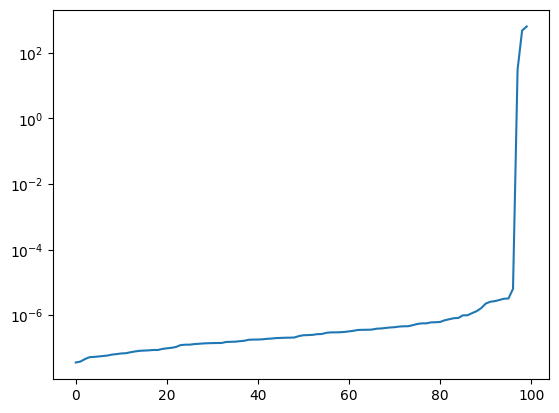

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sorted((bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu()))
plt.yscale('log')
plt.savefig('fig.pdf')
plt.show()

In [ ]:
sorted((bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu())

[tensor(3.6148e-08),
 tensor(3.8437e-08),
 tensor(4.5830e-08),
 tensor(5.2239e-08),
 tensor(5.3390e-08),
 tensor(5.5046e-08),
 tensor(5.6886e-08),
 tensor(5.8989e-08),
 tensor(6.3054e-08),
 tensor(6.5203e-08),
 tensor(6.8160e-08),
 tensor(6.9270e-08),
 tensor(7.4002e-08),
 tensor(7.8427e-08),
 tensor(8.1938e-08),
 tensor(8.3392e-08),
 tensor(8.4621e-08),
 tensor(8.6863e-08),
 tensor(8.6875e-08),
 tensor(9.3282e-08),
 tensor(9.7889e-08),
 tensor(1.0107e-07),
 tensor(1.0728e-07),
 tensor(1.2241e-07),
 tensor(1.2591e-07),
 tensor(1.2613e-07),
 tensor(1.3140e-07),
 tensor(1.3423e-07),
 tensor(1.3761e-07),
 tensor(1.3957e-07),
 tensor(1.4112e-07),
 tensor(1.4183e-07),
 tensor(1.4203e-07),
 tensor(1.5233e-07),
 tensor(1.5429e-07),
 tensor(1.5569e-07),
 tensor(1.6120e-07),
 tensor(1.6585e-07),
 tensor(1.7855e-07),
 tensor(1.8019e-07),
 tensor(1.8072e-07),
 tensor(1.8409e-07),
 tensor(1.9005e-07),
 tensor(1.9381e-07),
 tensor(2.0038e-07),
 tensor(2.0271e-07),
 tensor(2.0547e-07),
 tensor(2.064

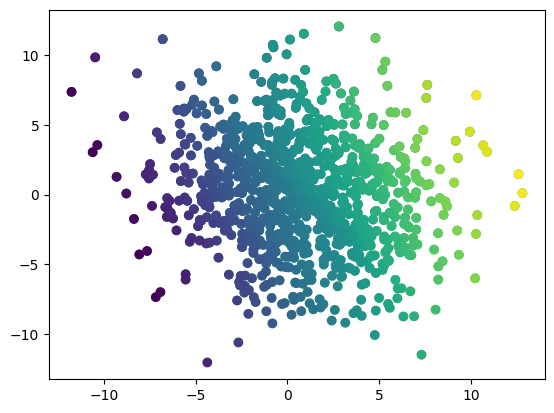

In [ ]:
mu, sigma = bmds(dist.to(torch.device('cuda')))

plt.subplot()
plt.scatter(*mu[:, (bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu().argsort()[-2:]].T.detach().cpu(), c=latent_data[:, 0])

plt.subplot()
plt.scatter(*mu[:, (bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu().argsort()[-2:]].T.detach().cpu(), c=latent_data[:, 1])

plt.savefig('fig.pdf')

plt.show()

In [ ]:
(bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu().argsort()[-2:]

tensor([43,  1])

In [127]:
batch_size = 1000

dataset = NeighborsDataset(distances, neighbors)
bmds = NeighborsBMDS(distances, neighbors, batch_size, n, len(dataset))
bmds_trainer = BMDSTrainer(bmds, lr=1e-2)

bmds_trainer.train(create_generator(dataset, batch_size=batch_size), project_name='bmds mnist', experiment_name='first trial', total_iters=100000)

100%|██████████| 100000/100000 [3:10:58<00:00,  8.73it/s]  


log_prob/train,▁▄▅▇▇▇▇▇▇▇██████████████████████████████
loss/train,█▅▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
reg/train,████▆▃▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
scale # 1/train,▁▁▁▁▁▁▁▂▃▅▆▇██▆█▇█▇▇▇▇███▇▇▆▇▇▇▇▇▇▇▆▆▇▇▇
scale # 11/train,▁▁▁▁▁▁▁▂▃▄▆▇▇▇▆█▇█▇▇▇▇█▇█▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇
scale # 2/train,▁▁▁▁▁▁▁▂▃▄▅▇▇▇▆█▇█▇▇▇▇█▇█▇▇▆▇▇▇▇▇▇▇▇▆▇▇▇
scale # 21/train,▁▁▁▁▁▁▁▂▃▄▅▇▇▇▆█▇█▇▇▇▇▇▇█▇▇▆▇▇▇▇▇▇▇▇▆▇▇▇
scale # 3/train,▁▁▁▁▁▁▁▂▃▄▆▇▇▇▆█▇█▇▇▇▇█▇█▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇
scale # 31/train,▁▁▁▁▁▁▁▂▃▄▅▇▇▇▆█▇█▇▇▇▇▇▇▇▇▇▆▇▇▇▇▇▇▆▆▆▇▇▇
scale # 4/train,▁▁▁▁▁▁▁▂▃▄▆▇▇▇▆█▇█▇▇▇▇█▇█▇▇▆▇▇▇▇▇▇▇▇▇▇▇█
scale # 41/train,▃▃▂▁▁▁▁▂▃▅▅▆▆▆█▆▆▆▆▆▅▅▆▅▅▅▅▅▅▅▅▅▄▄▅▅▄▄▄▅


In [121]:
# bmds_trainer.switch_back_from_ema()
bmds_trainer.switch_to_ema()

In [128]:
idx = torch.arange(n)

neighbors_idx = bmds.neighbors[idx].reshape(-1)
neighbors_dist_sqr = bmds.dist_sqr[idx].reshape(-1)

inp = torch.sparse_coo_tensor(
    indices=torch.stack((torch.arange(n, device=torch.device('cuda')).repeat(k, 1).T.reshape(-1), neighbors_idx)),
    values=neighbors_dist_sqr,
    size=(n, n),
)

mu, sigma = bmds(inp)

In [129]:
sorted((bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu())[-30:]

[tensor(14496.7812),
 tensor(15409.3848),
 tensor(17403.6855),
 tensor(23729.2559),
 tensor(28373.5781),
 tensor(34916.6445),
 tensor(35450.1562),
 tensor(38149.8008),
 tensor(53760.5391),
 tensor(58744.0195),
 tensor(98757.1016),
 tensor(105092.6328),
 tensor(145473.5000),
 tensor(155365.5938),
 tensor(161037.7344),
 tensor(271720.4688),
 tensor(273411.1562),
 tensor(293115.2500),
 tensor(314875.5312),
 tensor(326512.9688),
 tensor(336861.9062),
 tensor(712413.4375),
 tensor(900207.),
 tensor(1213865.7500),
 tensor(10327730.),
 tensor(10927377.),
 tensor(13889069.),
 tensor(58509180.),
 tensor(79871176.),
 tensor(1.9551e+08)]

In [130]:
sorted((mu / sigma).pow(2).mean(0).detach().cpu())[-30:]

[tensor(3751.0632),
 tensor(3854.7803),
 tensor(3936.6204),
 tensor(3955.2217),
 tensor(4082.5132),
 tensor(4096.9121),
 tensor(4244.6411),
 tensor(4271.6821),
 tensor(4276.3198),
 tensor(4307.6162),
 tensor(4912.3647),
 tensor(4926.5586),
 tensor(5040.1646),
 tensor(5141.2598),
 tensor(5875.8955),
 tensor(5962.7876),
 tensor(6586.7383),
 tensor(6713.9624),
 tensor(6785.5693),
 tensor(6920.0234),
 tensor(7340.8452),
 tensor(8421.2969),
 tensor(8967.0576),
 tensor(9256.8330),
 tensor(10289.4131),
 tensor(14438.2900),
 tensor(17084.5098),
 tensor(18245.7559),
 tensor(18734.4180),
 tensor(19021.3750)]

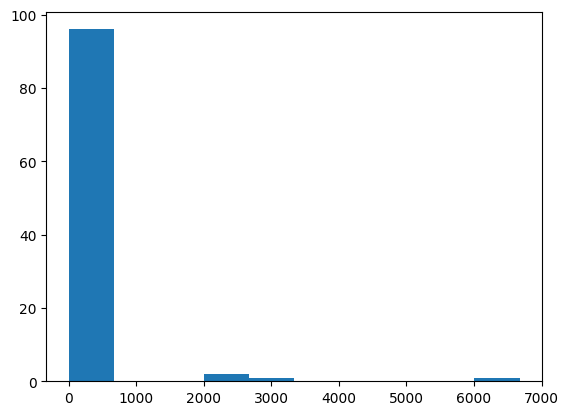

In [15]:
import matplotlib.pyplot as plt


plt.hist(sorted((bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu()))
plt.savefig('fig.pdf')

In [131]:
embedding = mu[:, (bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu() > 10].detach().cpu()

In [132]:
target = np.array([*map(get_proj(1), mnist)])

In [133]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
clf.fit(embedding, target)
(clf.predict(embedding) == target).mean()

/home/coder/.local/lib/rolos-ml-p39/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.83925

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SS

embedding = SS().fit_transform(PCA(n_components=((bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu() > 10).sum()).fit_transform(images))

InvalidParameterError: The 'n_components' parameter of PCA must be an int in the range [0, inf), a float in the range (0.0, 1.0), a str among {'mle'} or None. Got tensor(37) instead.

In [ ]:
clf = LogisticRegression()
clf.fit(embedding, target)
(clf.predict(embedding) == target).mean()

0.875

In [87]:
mu

tensor([[ 0.4987, -0.0722,  0.3355,  ..., -0.0904, -0.0669, -0.1598],
        [-0.2713, -0.1191,  0.2165,  ..., -0.1284, -0.1122, -0.3250],
        [ 0.3505, -0.0841,  0.1860,  ..., -0.0250, -0.0535, -0.1725],
        ...,
        [ 0.3972, -0.0812,  0.2420,  ...,  0.0036, -0.0587, -0.2133],
        [-0.2223, -0.0787,  0.1916,  ..., -0.0717, -0.1041, -0.1259],
        [-0.2315, -0.0520,  0.1528,  ..., -0.0015, -0.0130, -0.1785]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
batch_size = 1000

dataset = NeighborsDataset(distances, neighbors)
bmds = NeighborsBMDS(distances, neighbors, batch_size, n, len(dataset))
bmds_trainer = BMDSTrainer(bmds, lr=1e-4)

bmds_trainer.train(create_generator(dataset, batch_size=batch_size), project_name='bmds mnist', experiment_name='first trial', total_iters=100000)

In [ ]:
idx = torch.arange(n)

neighbors_idx = bmds.neighbors[idx].reshape(-1)
neighbors_dist_sqr = bmds.dist_sqr[idx].reshape(-1)

inp = torch.sparse_coo_tensor(
    indices=torch.stack((torch.arange(n, device=torch.device('cuda')).repeat(k, 1).T.reshape(-1), neighbors_idx)),
    values=neighbors_dist_sqr,
    size=(n, n),
)

mu, sigma = bmds(inp)

embedding = mu[:, (bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu() > 10].detach().cpu()
clf = LogisticRegression()
clf.fit(embedding, target)
(clf.predict(embedding) == target).mean()

In [ ]:
embedding = SS().fit_transform(PCA(n_components=((bmds.mu / bmds.sigma).pow(2).mean(0).detach().cpu() > 10).sum()).fit_transform(images))
clf = LogisticRegression()
clf.fit(embedding, target)
(clf.predict(embedding) == target).mean()